In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from pylab import rcParams
sns.set()

In [2]:
df=pd.read_csv("/Users/keyurpatel/Downloads/n_movies.csv")

In [3]:
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


In [4]:
df.columns

Index(['title', 'year', 'certificate', 'duration', 'genre', 'rating',
       'description', 'stars', 'votes'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [6]:
df.shape

(9957, 9)

In [7]:
df.describe()

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


In [8]:
df.isna().sum().sort_values(ascending=False)

certificate    3453
duration       2036
rating         1173
votes          1173
year            527
genre            73
title             0
description       0
stars             0
dtype: int64

In [9]:
missing_perc=df.isna().sum().sort_values(ascending=False)/len(df)*100
missing_perc

certificate    34.679120
duration       20.447926
rating         11.780657
votes          11.780657
year            5.292759
genre           0.733153
title           0.000000
description     0.000000
stars           0.000000
dtype: float64

<AxesSubplot:>

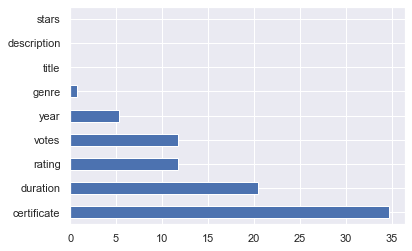

In [10]:
missing_perc.plot(kind='barh')

In [11]:
df['Duration']=df['duration'].str.split(' ').str[0].str.split(' ').str[0]

In [12]:
df.drop('duration',axis=1,inplace=True)

In [13]:
df['Duration'].value_counts(ascending=False).head()

60    385
24    295
30    265
45    211
90    193
Name: Duration, dtype: int64

In [14]:
df['Duration'].fillna(df['Duration'].median(), inplace=True)
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [15]:
df['Duration']=df['Duration'].astype('int')
df['rating']=df['rating'].astype('int')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        9957 non-null   object
 1   year         9430 non-null   object
 2   certificate  6504 non-null   object
 3   genre        9884 non-null   object
 4   rating       9957 non-null   int64 
 5   description  9957 non-null   object
 6   stars        9957 non-null   object
 7   votes        8784 non-null   object
 8   Duration     9957 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 700.2+ KB


In [17]:
df['rating'].unique()

array([8, 5, 7, 9, 6, 4, 3, 2, 1])

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['title']=labelencoder.fit_transform(df['title'])

/Users/keyurpatel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Title'), Text(0, 0.5, 'Rating'), None]

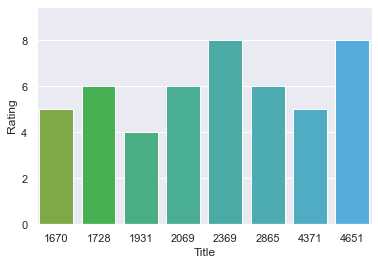

In [19]:
g=sns.barplot(df['title'].head(20),'rating',data=df)
g.set(xlabel = 'Title', ylabel = 'Rating',xmargin=-0.3)

/Users/keyurpatel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Title'), Text(0, 0.5, 'Duration'), None]

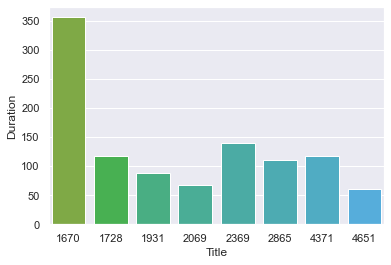

In [20]:
g=sns.barplot(df['title'].head(20),'Duration',data=df)
g.set(xlabel = 'Title', ylabel = 'Duration',xmargin=-0.3)

In [21]:
df['genre_1']=df['genre'].str.split(',').str[0]
df['genre_2']=df['genre'].str.split(',').str[1]
df['genre_3']=df['genre'].str.split(',').str[2]
df.drop('genre',axis=1,inplace=True)

In [22]:
df['genre_1'].unique()

array(['Action', 'Biography', 'Crime', 'Drama', 'Animation', 'Comedy',
       'Thriller', 'Documentary', 'Horror', 'Adventure', 'Reality-TV',
       'Mystery', 'Family', 'Game-Show', 'Short', 'Fantasy', 'Romance',
       'History', 'Sci-Fi', 'Talk-Show', 'Sport', 'Film-Noir', nan,
       'Western', 'Music', 'News', 'Musical'], dtype=object)

In [23]:
df['genre_2'].unique()

array([' Comedy', ' Drama', ' Horror', ' Action', ' Fantasy',
       ' Adventure', ' Crime', nan, ' Romance', ' History', ' Biography',
       ' Mystery', ' Thriller', ' Family', ' Short', ' Music', ' War',
       ' Musical', ' Sci-Fi', ' Reality-TV', ' Western', ' Sport',
       ' Game-Show', ' News', ' Animation', ' Film-Noir', ' Documentary',
       ' Talk-Show'], dtype=object)

In [24]:
df['genre_3'].unique()

array([' Drama', ' History', nan, ' Mystery', ' Adventure', ' Horror',
       ' Comedy', ' Thriller', ' Sport', ' Sci-Fi', ' Crime', ' Romance',
       ' Fantasy', ' Family', ' Action', ' War', ' Music', ' Biography',
       ' Western', ' Musical', ' Reality-TV', ' Talk-Show', ' Film-Noir',
       ' News', ' Game-Show', ' Short'], dtype=object)

In [25]:
labelencoder=LabelEncoder()
df['genre_1']=labelencoder.fit_transform(df['genre_1'])
df['genre_2']=labelencoder.fit_transform(df['genre_2'])
df['genre_3']=labelencoder.fit_transform(df['genre_3'])

In [26]:
df.describe()

,title,rating,Duration,genre_1,genre_2,genre_3
count,9957.000000,9957.000000,9957.000000,9957.000000,9957.000000,9957.00000
mean,3995.019283,6.273376,72.386964,5.219544,13.626996,17.85126
std,2304.539797,1.179197,44.929922,4.748941,10.063991,8.86328
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000
25%,1980.000000,6.000000,46.000000,2.000000,5.000000,10.00000
50%,3992.000000,6.000000,67.000000,4.000000,9.000000,25.00000
75%,6048.000000,7.000000,93.000000,7.000000,27.000000,25.00000
max,7911.000000,9.000000,990.000000,26.000000,27.000000,25.00000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        9957 non-null   int64 
 1   year         9430 non-null   object
 2   certificate  6504 non-null   object
 3   rating       9957 non-null   int64 
 4   description  9957 non-null   object
 5   stars        9957 non-null   object
 6   votes        8784 non-null   object
 7   Duration     9957 non-null   int64 
 8   genre_1      9957 non-null   int64 
 9   genre_2      9957 non-null   int64 
 10  genre_3      9957 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 855.8+ KB


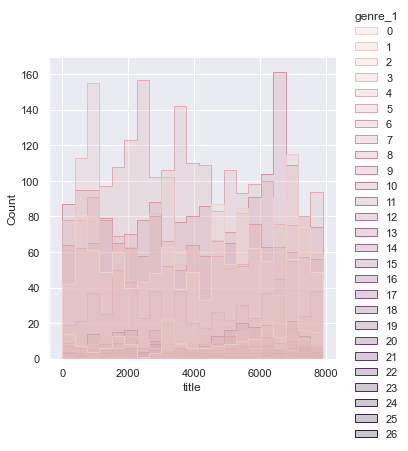

In [28]:
sns.displot(df, x=df['title'], hue="genre_1", element="step")

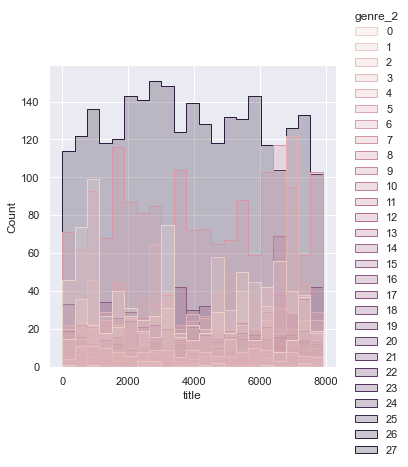

In [29]:
sns.displot(df, x=df['title'], hue="genre_2", element="step")

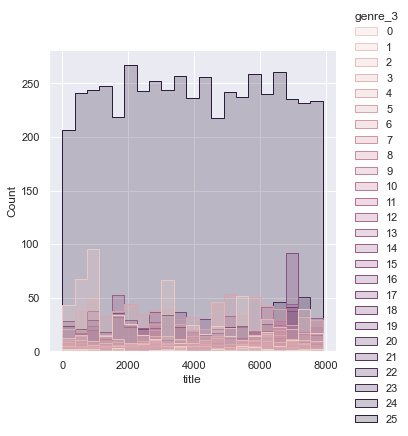

In [30]:
sns.displot(df, x=df['title'], hue="genre_3", element="step")  

In [31]:
df

,title,year,certificate,rating,description,stars,votes,Duration,genre_1,genre_2,genre_3
0,1292,(2018– ),TV-14,8,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",30,0,4,5
1,6128,(2016– ),TV-MA,8,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",58,3,7,10
2,777,(2015–2022),TV-MA,8,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",46,5,7,25
3,1670,(2022),TV-MA,5,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",356,7,13,14
4,1450,(2022– ),TV-MA,8,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",24,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9952,6383,(2022– ),TV-MA,6,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130",45,0,1,5
9953,6938,(2010–2022),TV-MA,8,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067",44,7,13,22
9954,6128,(2016– ),TV-MA,8,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898",58,3,7,10
9955,5770,(2005–2020),TV-14,8,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601",44,7,9,11


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        9957 non-null   int64 
 1   year         9430 non-null   object
 2   certificate  6504 non-null   object
 3   rating       9957 non-null   int64 
 4   description  9957 non-null   object
 5   stars        9957 non-null   object
 6   votes        8784 non-null   object
 7   Duration     9957 non-null   int64 
 8   genre_1      9957 non-null   int64 
 9   genre_2      9957 non-null   int64 
 10  genre_3      9957 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 855.8+ KB


In [33]:
df['year'] = df['year'].astype(str).apply(lambda x: x.replace('–', ','))
df['year'] = df['year'].astype(str).apply(lambda x: x.replace('(', ''))
df['year'] = df['year'].astype(str).apply(lambda x: x.replace(')', ''))

In [34]:
df['year']

0          2018, 
1          2016, 
2       2015,2022
3            2022
4          2022, 
          ...    
9952       2022, 
9953    2010,2022
9954       2016, 
9955    2005,2020
9956         2022
Name: year, Length: 9957, dtype: object

In [35]:
df['year_1']=df['year'].str.split(',').str[0]
df['year_2']=df['year'].str.split(',').str[1]
df.drop('year',axis=1,inplace=True)

In [36]:
df['year_2'].value_counts(ascending=False)

        2039
2020     342
2021     258
2019     171
2022     139
2018      92
2014      82
2012      81
2017      64
2008      56
2023      53
2013      47
2016      37
2015      28
2010      28
2011       8
2000       8
2009       6
2002       5
1996       5
2007       5
1999       5
2004       5
2006       4
2005       4
2001       3
1998       2
1995       2
1989       2
1991       1
2003       1
1993       1
1969       1
1979       1
1974       1
1994       1
1997       1
Name: year_2, dtype: int64

In [37]:
df['year_2'].fillna(0,inplace=True)

In [38]:
df['year_2'] = df['year_2'].replace(" ", 0)

In [39]:
df.isna().sum().sort_values(ascending=False)

certificate    3453
votes          1173
title             0
rating            0
description       0
stars             0
Duration          0
genre_1           0
genre_2           0
genre_3           0
year_1            0
year_2            0
dtype: int64

In [40]:
df

,title,certificate,rating,description,stars,votes,Duration,genre_1,genre_2,genre_3,year_1,year_2
0,1292,TV-14,8,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",30,0,4,5,2018,0
1,6128,TV-MA,8,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",58,3,7,10,2016,0
2,777,TV-MA,8,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",46,5,7,25,2015,2022
3,1670,TV-MA,5,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",356,7,13,14,2022,0
4,1450,TV-MA,8,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",24,2,0,1,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9952,6383,TV-MA,6,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130",45,0,1,5,2022,0
9953,6938,TV-MA,8,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067",44,7,13,22,2010,2022
9954,6128,TV-MA,8,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898",58,3,7,10,2016,0
9955,5770,TV-14,8,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601",44,7,9,11,2005,2020


In [41]:
df.isna().sum()

title             0
certificate    3453
rating            0
description       0
stars             0
votes          1173
Duration          0
genre_1           0
genre_2           0
genre_3           0
year_1            0
year_2            0
dtype: int64

In [42]:
df

,title,certificate,rating,description,stars,votes,Duration,genre_1,genre_2,genre_3,year_1,year_2
0,1292,TV-14,8,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031",30,0,4,5,2018,0
1,6128,TV-MA,8,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885",58,3,7,10,2016,0
2,777,TV-MA,8,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384",46,5,7,25,2015,2022
3,1670,TV-MA,5,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773",356,7,13,14,2022,0
4,1450,TV-MA,8,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413",24,2,0,1,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9952,6383,TV-MA,6,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130",45,0,1,5,2022,0
9953,6938,TV-MA,8,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067",44,7,13,22,2010,2022
9954,6128,TV-MA,8,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898",58,3,7,10,2016,0
9955,5770,TV-14,8,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601",44,7,9,11,2005,2020


In [43]:
df['votes'] = df['votes'].astype(str).apply(lambda x: x.replace(',', ''))
df['votes'] 

0       177031
1       199885
2       501384
3         9773
4        15413
         ...  
9952      3130
9953    970067
9954    199898
9955    439601
9956      9786
Name: votes, Length: 9957, dtype: object

In [44]:
df['votes'].fillna(df['votes'].median(),inplace=True)

In [45]:
df.isna().sum()

title             0
certificate    3453
rating            0
description       0
stars             0
votes             0
Duration          0
genre_1           0
genre_2           0
genre_3           0
year_1            0
year_2            0
dtype: int64

In [46]:
labelencoder=LabelEncoder()
df['votes']=labelencoder.fit_transform(df['votes'])
df['votes'].value_counts(ascending=True)

1177       1
4326       1
2560       1
3626       1
637        1
        ... 
967       21
838       21
4401      27
2304      33
4862    1173
Name: votes, Length: 4863, dtype: int64

In [47]:
df.drop('description',axis=1,inplace=True)
df.drop('stars',axis=1,inplace=True)
df.drop('certificate',axis=1,inplace=True)

In [48]:
df

,title,rating,votes,Duration,genre_1,genre_2,genre_3,year_1,year_2
0,1292,8,1177,30,0,4,5,2018,0
1,6128,8,1456,58,3,7,10,2016,0
2,777,8,3449,46,5,7,25,2015,2022
3,1670,5,4806,356,7,13,14,2022,0
4,1450,8,898,24,2,0,1,2022,0
...,...,...,...,...,...,...,...,...,...
9952,6383,6,2399,45,0,1,5,2022,0
9953,6938,8,4796,44,7,13,22,2010,2022
9954,6128,8,1457,58,3,7,10,2016,0
9955,5770,8,3174,44,7,9,11,2005,2020


In [52]:
df.to_excel(r'/Users/keyurpatel/Downloads/n_movies.xlsx', sheet_name='netflixdata', index = False)
#/Users/keyurpatel/Downloads/n_movies.csv